# Plotting with `DataFrame`s

Pandas `DataFrame`s also provide a plotting API through a [`.plot()`](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.plot.html) method. More specialized methods like [`.bar()`](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.plot.bar.html) are also available.

In the following we will use our previously gained knowledge on selecting data from `DataFrame`s to explore some --- hopefully interesting --- plotting capabilities.

In [1]:
%matplotlib inline

import pandas as pd
import numpy as np
import matplotlib as mpl
from matplotlib import pyplot as plt

mpl.style.use("seaborn-v0_8-colorblind")

f"Pandas version: {pd.__version__ = }, Numpy version: {np.__version__ = }"

"Pandas version: pd.__version__ = '2.2.3', Numpy version: np.__version__ = '2.2.3'"

The easiest way is to access each column individually; this leaves us with a `Series` for which we know how to create plots. We start with plotting the distribution of each measured quantity as a histogram in a separate graph.

In [2]:
df_iris = pd.read_csv(
    "https://archive.ics.uci.edu/ml/machine-learning-databases/iris/iris.data",
    names=["sepal length", "sepal width", "petal length", "petal width", "species"],
)

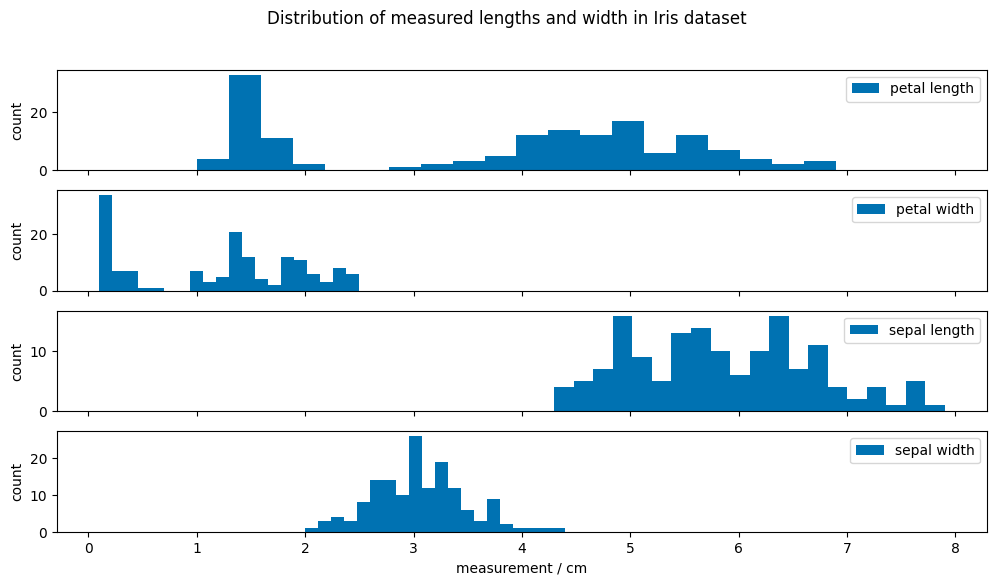

In [5]:
fig, axes = plt.subplots(4, 1, sharex=True, sharey=False, figsize=(12, 6))

fig.suptitle("Distribution of measured lengths and width in Iris dataset")

for colname, ax in zip(df_iris.columns.difference(["species"]), axes):
    (
        df_iris[colname]
        .plot.hist(
            ax=ax,
            bins=20,
            label=colname,
            legend=True,
            xlabel="measurement / cm",
            ylabel="count"
        )
    )

Indeed, we can achieve this kind of plot even simpler. As we can see many of the parameters used to specify the subplot layout above with `plt.subplots()` can also be passed directly to the plotting method. We use the `bool`ean parameter `subplots=True` (in combination with `layout`) to generate a separate graph for each plot. This allows to comfortably plot multiple columns with from a single `DataFrame`. 

There is a difference observed for the bin widths. Above, the width is computed invidiually for each plot while in the plots below the bin width seems to be to chosen to be the same for each plot.

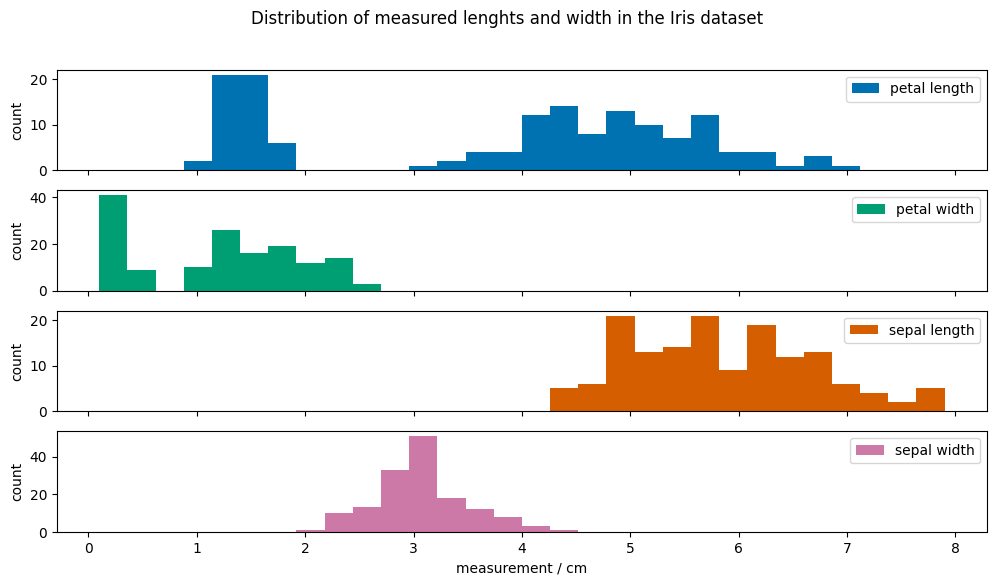

In [21]:
(
    df_iris
    [df_iris.columns.difference(["species"])] # select columns with measure data
    .plot
    .hist(
        bins=30,
        subplots=True,
        layout=(4, 1),
        figsize=(12, 6 ),
        sharex=True,
        sharey=False,
        title="Distribution of measured lenghts and width in the Iris dataset",
        xlabel="measurement / cm",
        ylabel="count",
    )
);

For completeness we show the distributions in a single graph.

<Axes: title={'center': 'Distribution of measured lenghts and width in the Iris dataset'}, xlabel='measurement / cm', ylabel='count'>

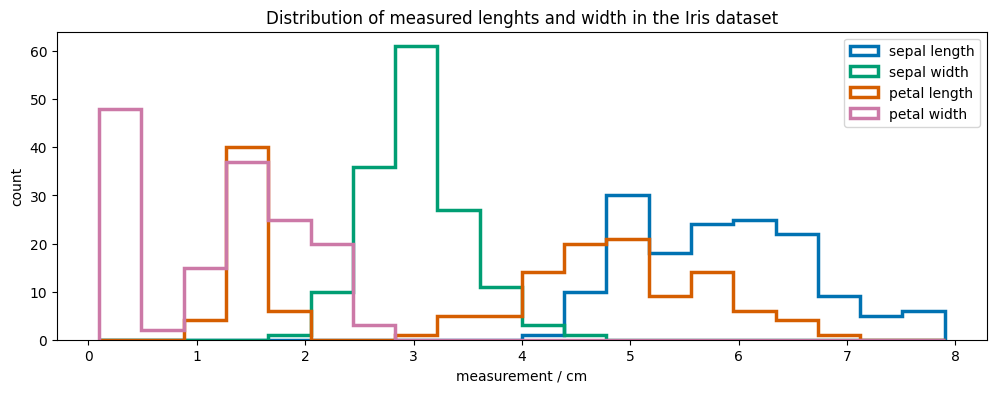

In [20]:
(
    df_iris
    .filter(regex="(length|width)")
    .plot.hist(
        bins=20,
        subplots=False,
        # determines the style of the histogram
        histtype="step",
        linewidth=2.5,
        # 
        title="Distribution of measured lenghts and width in the Iris dataset",
        xlabel="measurement / cm",
        ylabel="count",
        figsize=(12, 4),
    )
)

## Exercises

:::{note} Please use the `DataFrame` plotting API whenever possible in the exercises below. For some of the tasks it will be helpful to know how to select values from the `DataFrame`. Refer to [this section](dataframe-acessing-rows-and-columns) if you need a refresher on this..
:::

### Boxplots

Create boxplots each of the measured quantities sepal length, sepal width, petal length, and petal width. Add grid lines along the y-axis. Also make sure to add a title and axes labels (with units?) where suitable.

There are two methods we can use, [`.plot.box()`](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.plot.box.html) and [`.boxplot()`](https://pandas.pydata.org/docs/reference/api/pandas.plotting.boxplot.html).

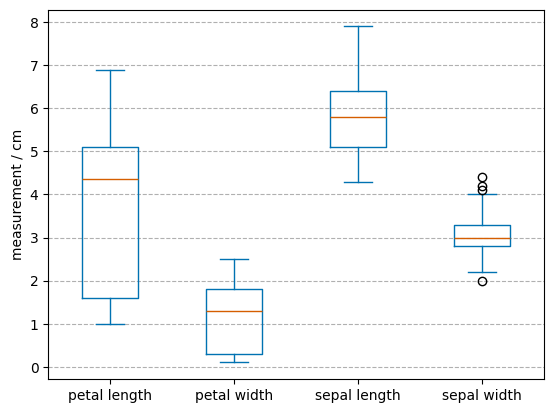

In [28]:
(
    df_iris
    .loc[:, df_iris.columns.difference(["species"])]
    .plot.box(
        ylabel="measurement / cm",
    ) # returns an Axis object
    .grid(which="major", axis="y", linestyle="--")
)


Text(0.5, 1.0, 'Spread of lengths and widths in the Iris dataset')

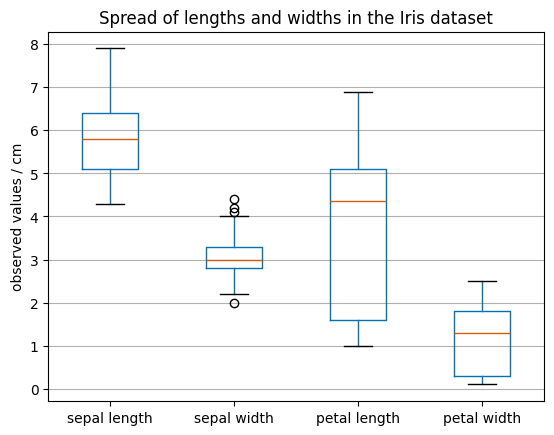

In [29]:
ax = df_iris.boxplot(
    grid=False,
    ylabel="observed values / cm",
)

ax.grid(which="major", axis="y")
ax.set_title("Spread of lengths and widths in the Iris dataset")

Next, we are interested in the distribution of lengths and widths for each specie. Generate a box plot for each specie just as above for the full dataset. Arrange the plots in a suitable grid of subplots

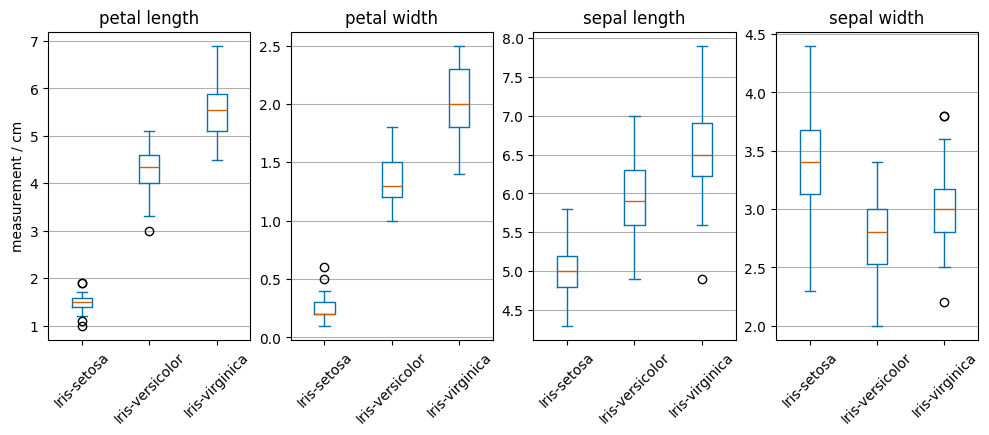

In [42]:
axes = (
    df_iris
    .plot.box(
        by="species",
        # ylabel="measurement / cm",
        layout=(1, 4),
        figsize=(12, 4),
        rot=45,
        # sharey=True,
    )
)

axes.loc["petal length"].set_ylabel("measurement / cm")
axes.transform(lambda a: a.grid(which="major", axis="y"));

In [ ]:
axes = df_iris.boxplot(
    by="species",
    ylabel="observed value / cm",
    sharey=True,
    figsize=(20, 4),
    layout=(1, 4),
)

# Get the figure containing the subplots from an axes object. We
# use the figure to customize the title of the full plot.
(
    axes[0]
    .get_figure()
    .suptitle(
        "Spread of lengths and widths in Iris dataset grouped by species",
        verticalalignment="bottom",
    )
)

for ax in axes:
    ax.grid(which="major", axis="x")

### Violin plot

Violin plots convey the a similar type of information as boxplots or histograms (to some extent a combination of the two). While histograms bin data, count the number of values that fall into a particular bin and plot that count, violin plots contain a "smoothed" version of this. These "smoothed histograms" estimate the observed data distribution by means of a kernel density estimate (KDE).

Matplotlib provides us with the [`violinplot()`](https://matplotlib.org/stable/api/_as_gen/matplotlib.pyplot.violinplot.html) function that can also be called from `Axis` objects. Read through the documentation and try to generate a violinplot of the observed data distribution of the sepal length, petal length, sepal width, and petal width.

Also make sure to have a look at the examples at the bottom of the [violin plot documentation](https://matplotlib.org/stable/api/_as_gen/matplotlib.pyplot.violinplot.html) to learn about about violin plots themselves and how to customize them.

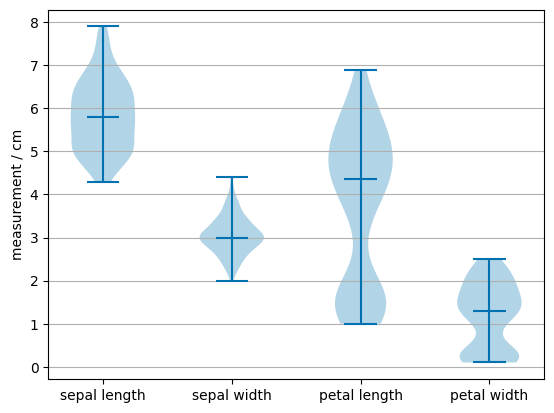

In [64]:
fig, ax = plt.subplots(1, 1)

ax.violinplot(
    df_iris[df_iris.columns[:-1]],
    showmedians=True,
    showextrema=True,
);

ax.set_ylabel("measurement / cm")
ax.yaxis.grid(True)
ax.set_xticks(range(1, 5), df_iris[df_iris.columns[:-1]]);

In [48]:
# (
#     df_iris
#     .select_dtypes("object")
# )

#### Scatter plots

[Earlier](plotting-data-from-iris-dataset) in this course we have created scatter plots to check if there is a correlation between different measured quantities in the Iris dataset. 

Create scatter plots of all reasonable combinations of sepal length, sepal width, petal length and petal width. Arrange the plots in suitable grid of subplots.

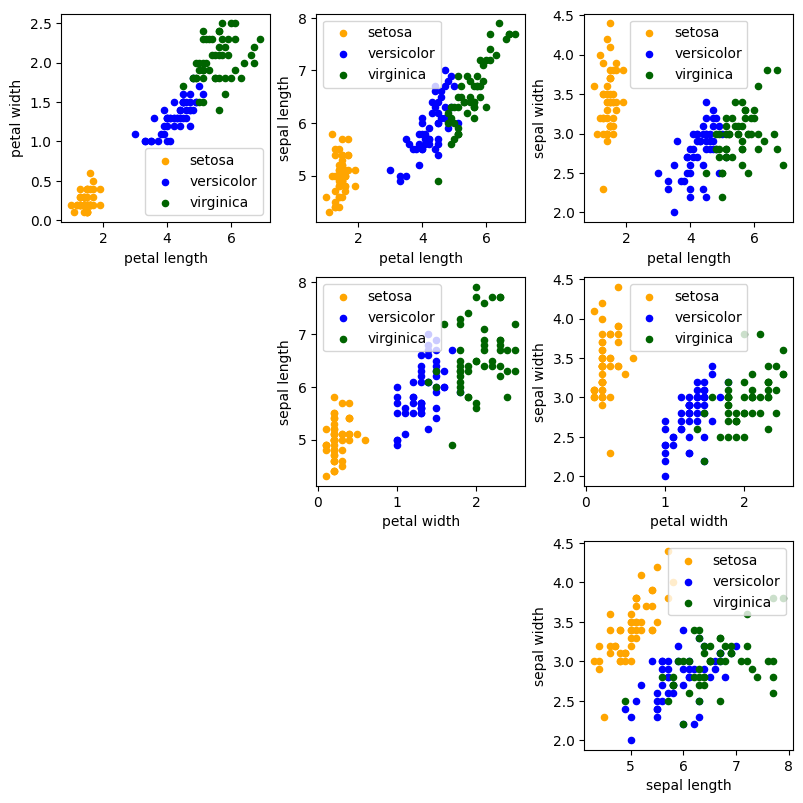

In [62]:
column_names = df_iris.columns.difference(["species"]).to_list()

layout = [
    [
        f"{name1}-{name2}" if idx2 > idx1 else "."
        for idx2, name2 in enumerate(column_names)
    ]
    for idx1, name1 in enumerate(column_names)
]

# layout

fig, axesdict = plt.subplot_mosaic(layout, layout="constrained", figsize=(10, 10))

for combination, ax in axesdict.items():
    colname1, colname2 = combination.split("-")
    for s, color in zip(
        df_iris["species"].unique(),
        ("orange", "blue", "darkgreen"),
    ):
        (
            df_iris.query(f"species == '{s}'").plot.scatter(
                x=colname1,
                y=colname2,
                ax=ax,
                label=s.split("-")[-1],
                c=color,
                legend=True,
            )
        )